# Mushroom Project

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

Importing dataset file

In [65]:
data = pd.read_csv("Mushroom.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
data.shape

(8124, 23)

In dataset, 8124 rows and 23 columns

In [67]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We have object type value in all variables
and class is our target variables 

In [68]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no missing value

In [69]:
data['class'].unique()

array(['p', 'e'], dtype=object)

There are 2 unique value in data['class']

In [70]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# EDA

 Univariant analysis

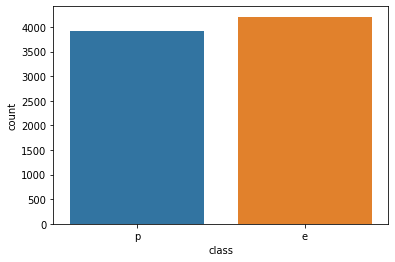

In [71]:
sns.countplot(data['class']);

Both are equally distributed, there is no class imbalance issue exits.

In [72]:

labels = data['class']

features = data.drop(data, axis=1)

In [73]:
categorical = data.columns 
data = pd.concat([data, pd.get_dummies(data[categorical])], axis=1) 
data.drop(categorical, axis=1, inplace=True) 

labels = pd.get_dummies(labels)['p']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.2, random_state=0)

In [75]:
X_train.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7434,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7725,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
783,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1928,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7466,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In Target class, 1 is deadly 0 is safe to eat

In [76]:
X_test.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
380,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3641,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
273,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1029,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
684,1,0,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0


In [77]:
y_train.shape

(6499,)

In [78]:
y_test.shape

(1625,)

In [79]:
X_test.shape

(1625, 119)

In [80]:
X_train.shape

(6499, 119)

In [81]:
X_train.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7434,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7725,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
783,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1928,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7466,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


Checking Our Best Model

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
z = sorted(zip(clf.feature_importances_,X_train.columns),reverse=True)

z[:6]

[(0.33744112485441863, 'class_p'),
 (0.2395998408211943, 'class_e'),
 (0.07322536972834794, 'odor_n'),
 (0.04840410965357605, 'gill-color_b'),
 (0.03651645696735247, 'stalk-surface-above-ring_k'),
 (0.033776927595083155, 'gill-size_n')]

Saving Model

In [84]:
from joblib import dump, load
dump(clf, 'Mushroom.joblib')

['Mushroom.joblib']